# MYL3

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [3]:
MYL3_Path = pd.read_csv('MYL3.txt', sep='\t')
MYL3_Path

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_000258.3(MYL3):c.445A>G (p.Met149Val),MYL3,M149V,not provided|Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: Aug 31, 2017)","criteria provided, multiple submitters, no con...",VCV000014061,3,46901001,3,46859511,14061,29100,rs104893748,NC_000003.12:46859510:T:C,NaN
1,NM_000258.3(MYL3):c.281G>A (p.Arg94His),MYL3,R94H,not provided|Cardiomyopathy|Primary familial h...,Pathogenic/Likely pathogenic(Last reviewed: Se...,"criteria provided, multiple submitters, no con...",VCV000031777,3,46902192,3,46860702,31777,40437,rs199474703,NC_000003.12:46860701:C:T,NaN


In [4]:
MYL3_LP = pd.read_csv('MYL3_LP.txt', sep='\t')
newMYL3_LP = MYL3_LP['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
MYL3_LP1 = MYL3_LP[newMYL3_LP]
MYL3_LP1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
2,NM_000258.3(MYL3):c.281G>A (p.Arg94His),MYL3,R94H,Primary familial hypertrophic cardiomyopathy|H...,Pathogenic/Likely pathogenic(Last reviewed: Se...,"criteria provided, multiple submitters, no con...",VCV000031777,3,46902192,3.0,46860702.0,31777,40437,rs199474703,NC_000003.12:46860701:C:T,NaN


In [5]:
combined2 = [MYL3_LP1, MYL3_Path]
MYL3_combined = pd.concat(combined2)
MYL3_combined

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
2,NM_000258.3(MYL3):c.281G>A (p.Arg94His),MYL3,R94H,Primary familial hypertrophic cardiomyopathy|H...,Pathogenic/Likely pathogenic(Last reviewed: Se...,"criteria provided, multiple submitters, no con...",VCV000031777,3,46902192,3.0,46860702.0,31777,40437,rs199474703,NC_000003.12:46860701:C:T,NaN
0,NM_000258.3(MYL3):c.445A>G (p.Met149Val),MYL3,M149V,not provided|Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: Aug 31, 2017)","criteria provided, multiple submitters, no con...",VCV000014061,3,46901001,3.0,46859511.0,14061,29100,rs104893748,NC_000003.12:46859510:T:C,NaN
1,NM_000258.3(MYL3):c.281G>A (p.Arg94His),MYL3,R94H,not provided|Cardiomyopathy|Primary familial h...,Pathogenic/Likely pathogenic(Last reviewed: Se...,"criteria provided, multiple submitters, no con...",VCV000031777,3,46902192,3.0,46860702.0,31777,40437,rs199474703,NC_000003.12:46860701:C:T,NaN


In [6]:
combo = MYL3_combined[['Name']]
np.array(np.array(combo['Name'].str.split(' ')).item(0)).item(0)
lst = []
for i in np.arange(3):
    lst = np.append(lst, np.array(np.array(combo['Name'].str.split(' ')).item(i)).item(0))
    
lst
combo = Table().with_columns('Name', lst)
combo.show()

Name
NM_000258.3(MYL3):c.281G>A
NM_000258.3(MYL3):c.445A>G
NM_000258.3(MYL3):c.281G>A


In [7]:
import numpy as np
MYL3_ensembl_np = Table().read_table('MYL3_ensembl.txt', sep='\t').where('BIOTYPE', 'protein_coding')
new = MYL3_ensembl_np.select('#Uploaded_variation', 'Consequence')
#new = new.where('Consequence', are.containing('frameshift'))
new
#'.pivot('Consequence', '#Uploaded_variation')

#Uploaded_variation,Consequence
NM_000258.3(MYL3):c.445A>G,missense_variant
NM_000258.3(MYL3):c.445A>G,missense_variant
NM_000258.3(MYL3):c.445A>G,downstream_gene_variant
NM_000258.3(MYL3):c.445A>G,missense_variant
NM_000258.3(MYL3):c.445A>G,missense_variant
NM_000258.3(MYL3):c.445A>G,missense_variant
NM_000258.3(MYL3):c.281G>A,missense_variant
NM_000258.3(MYL3):c.281G>A,missense_variant
NM_000258.3(MYL3):c.281G>A,downstream_gene_variant
NM_000258.3(MYL3):c.281G>A,missense_variant


In [8]:
def label_consequence(consequence):
    if 'stop_gained' in consequence:
        return 'stop_gained'
    elif 'missense_variant' in consequence:
        return 'missense_variant'
    elif 'frameshift_variant' in consequence:
        return 'frameshift_variant'
    elif 'inframe_deletion' in consequence:
        return 'inframe_deletion'

In [9]:
try1 = new.apply(label_consequence, 'Consequence')
new2 = new.with_column('Our Consequences', try1)
new2
yay = new2.where('Our Consequences', are.not_equal_to(None))
test3 = yay.group('Our Consequences')
test3

Our Consequences,count
missense_variant,15


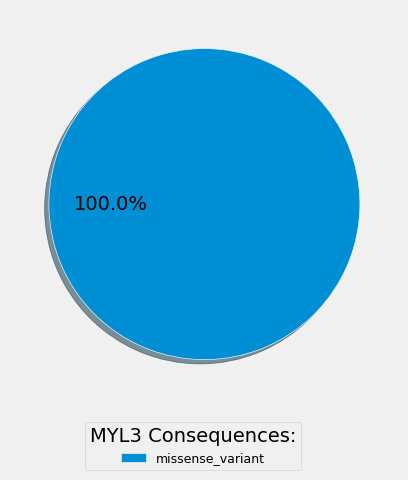

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.pie(test3.column('count'), autopct='%1.1f%%', shadow = True)
#,labels = test3.column('Our Consequences'), autopct='%1.1f%%', shadow = True)
plt.legend(title = 'MYL3 Consequences:', fontsize="9", labels = test3.column('Our Consequences'), loc ="lower center", bbox_to_anchor=(0.37, -0.2, 0.2, 0.2))

In [11]:
MYL3_VUS = pd.read_csv('MYL3_VUS.txt', sep='\t')
newMYL3_VUS = MYL3_VUS['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
MYL3_VUS1 = MYL3_VUS[newMYL3_VUS].dropna(subset=['Protein change'])
MYL3_VUS1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
5,NM_000258.3(MYL3):c.579del (p.Met193fs),MYL3,M193fs,Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Mar 1, 2...","criteria provided, single submitter",VCV001983370,3,46899743,3.0,46858253,1983370,2046430,NaN,NC_000003.12:46858252:C:,NaN
6,NM_000258.3(MYL3):c.579G>A (p.Met193Ile),MYL3,M193I,Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Aug 28, ...","criteria provided, single submitter",VCV000952927,3,46899743,3.0,46858253,952927,923219,rs1701951962,NC_000003.12:46858252:C:T,NaN
8,NM_000258.3(MYL3):c.575dup (p.Met193fs),MYL3,M193fs,Cardiovascular phenotype|Hypertrophic cardiomy...,"Uncertain significance(Last reviewed: Feb 26, ...","criteria provided, multiple submitters, no con...",VCV001004078,3,46899746 - 46899747,3.0,46858256 - 46858257,1004078,989606,rs757730888,NC_000003.12:46858256:A:AA,NaN
9,NM_000258.3(MYL3):c.575T>A (p.Ile192Asn),MYL3,"I129N, I134N, I192N",Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Mar 3, 2...","criteria provided, single submitter",VCV002105706,3,46899747,3.0,46858257,2105706,2166167,NaN,NC_000003.12:46858256:A:T,NaN
11,NM_000258.3(MYL3):c.568A>G (p.Lys190Glu),MYL3,K190E,Hypertrophic cardiomyopathy|not provided,"Uncertain significance(Last reviewed: Sep 26, ...","criteria provided, multiple submitters, no con...",VCV001311228,3,46899754,3.0,46858264,1311228,1300609,NaN,NC_000003.12:46858263:T:C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NM_000258.3(MYL3):c.32A>T (p.Asp11Val),MYL3,D11V,Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Jul 6, 2...","criteria provided, single submitter",VCV001015590,3,46904849,3.0,46863359,1015590,1004790,rs1227232995,NC_000003.12:46863358:T:A,NaN
167,NM_000258.3(MYL3):c.26A>G (p.Lys9Arg),MYL3,K9R,not specified|not provided|Cardiomyopathy|Hype...,"Uncertain significance(Last reviewed: Feb 12, ...","criteria provided, multiple submitters, no con...",VCV000373705,3,46904855,3.0,46863365,373705,359533,rs1025864971,NC_000003.12:46863364:T:C,NaN
170,NM_000258.3(MYL3):c.14A>C (p.Lys5Thr),MYL3,K5T,Inborn genetic diseases|Hypertrophic cardiomyo...,"Uncertain significance(Last reviewed: Aug 17, ...","criteria provided, multiple submitters, no con...",VCV001715451,3,46904867,3.0,46863377,1715451,1775596,NaN,NC_000003.12:46863376:T:G,NaN
171,NM_000258.3(MYL3):c.11A>G (p.Lys4Arg),MYL3,K4R,Hypertrophic cardiomyopathy|not provided,"Uncertain significance(Last reviewed: Sep 15, ...","criteria provided, multiple submitters, no con...",VCV000164490,3,46904870,3.0,46863380,164490,173940,rs727503301,NC_000003.12:46863379:T:C,NaN


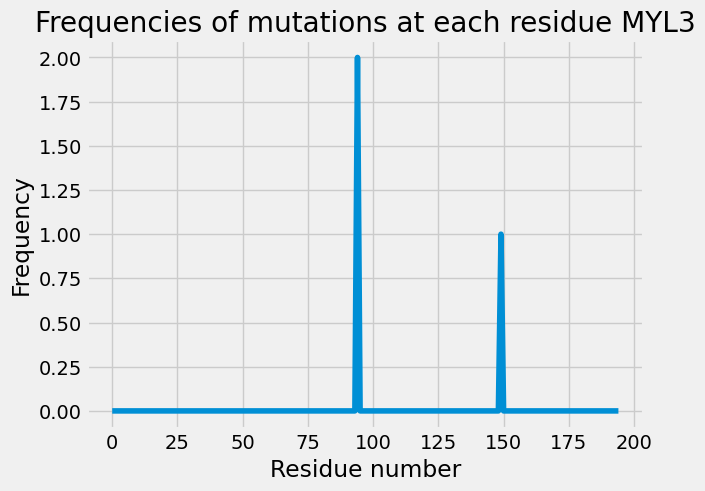

In [13]:
num_amino_acids_mybpc3 = 195

count = [0] * num_amino_acids_mybpc3

for i in MYL3_combined.index:
    s = MYL3_combined['Protein change'][i].replace('*', '')
    x = "".join([ele for ele in s if ele.isnumeric()])
    if x:
        x_value = int(x)
        count[x_value] += 1
        
    
# x axis values
x = [i for i in range(num_amino_acids_mybpc3)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue MYL3')
  
# function to show the plot
plt.show()

# save figure
# plt.savefig('mybpc3.png')

plt.close()

In [14]:
f = open("mybpc3_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_mybpc3):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()